# Projet Classifier automatiquement des biens de consommation : Notebook de classification d'images

In [1]:
# Chemins des répertoires contenant les images
train_dir = "C:\\Users\\tykap\\OneDrive\\Bureau\\Formation Data\\OpenClarooms\\P6\\Images\\"

In [2]:
# Importation des bibliothèques nécessaires

import tensorflow as tf
import matplotlib.pyplot as plt
import os

import pandas as pd
import numpy as np

In [3]:
# Lister les fichiers dans le répertoire
noms_fichiers = os.listdir(train_dir)

In [4]:
# Chargement du data frame des images et catégories

df = pd.read_csv("flipkart.csv",sep=",", index_col="uniq_id")

In [5]:
df = df.drop(columns=["Unnamed: 0"])
df

,image_path,label_name,label
uniq_id,,,
55b85ea15a1536d46b7190ad6fff8ce7,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Home Furnishing,4
7b72c92c2f6c40268628ec5f14c6d590,7b72c92c2f6c40268628ec5f14c6d590.jpg,Baby Care,0
64d5d4a258243731dc7bbb1eef49ad74,64d5d4a258243731dc7bbb1eef49ad74.jpg,Baby Care,0
d4684dcdc759dd9cdf41504698d737d8,d4684dcdc759dd9cdf41504698d737d8.jpg,Home Furnishing,4
6325b6870c54cd47be6ebfbffa620ec7,6325b6870c54cd47be6ebfbffa620ec7.jpg,Home Furnishing,4
...,...,...,...
958f54f4c46b53c8a0a9b8167d9140bc,958f54f4c46b53c8a0a9b8167d9140bc.jpg,Baby Care,0
fd6cbcc22efb6b761bd564c28928483c,fd6cbcc22efb6b761bd564c28928483c.jpg,Baby Care,0
5912e037d12774bb73a2048f35a00009,5912e037d12774bb73a2048f35a00009.jpg,Baby Care,0


In [6]:
from tensorflow.keras.preprocessing import image
import random

# Sélectionner une image aléatoire

image_aleatoire = random.choice(noms_fichiers)


# Chemin complet de l'image sélectionnée
img_path = os.path.join(train_dir, image_aleatoire)
img_path

'C:\\Users\\tykap\\OneDrive\\Bureau\\Formation Data\\OpenClarooms\\P6\\Images\\4e5ebfc871992e7e22365c0c036a1b89.jpg'

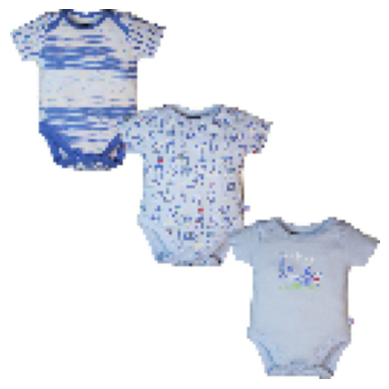

In [7]:
# Charger et afficher l'image
img = image.load_img(img_path, target_size=(128, 128))
plt.imshow(img)
plt.axis('off')
plt.show()

# Utilisation d'un modèle pré-entrainé

# Utilisation d'un Modèle Préentraîné pour la Classification des Images

Les modèles préentraînés offrent une solution puissante pour la classification des images, permettant de tirer parti de réseaux de neurones préalablement entraînés sur de larges ensembles de données. Deux méthodes principales sont couramment utilisées : l'extraction de caractéristiques (feature extraction) et le fine-tuning.

## Méthodes

### 1. Extraction de Caractéristiques (Feature Extraction)

L'extraction de caractéristiques consiste à utiliser un modèle préentraîné comme un extracteur de caractéristiques. Les couches convolutives du modèle sont utilisées pour extraire des caractéristiques des images, qui sont ensuite utilisées par un classificateur (tel qu'un réseau de neurones entièrement connecté) pour effectuer la classification.

**Étapes :**
1. Charger un modèle préentraîné sans la couche de classification finale.
2. Geler les poids des couches convolutives pour éviter de les entraîner à nouveau.
3. Ajouter une ou plusieurs couches de classification.
4. Entraîner uniquement les nouvelles couches de classification avec les nouvelles données.

### 2. Fine-Tuning

Le fine-tuning consiste à ajuster les poids de tout ou partie d'un modèle préentraîné en utilisant un nouvel ensemble de données. Cela permet d'adapter le modèle préentraîné à la nouvelle tâche de classification.

**Étapes :**
1. Charger un modèle préentraîné.
2. Débloquer certaines des dernières couches du modèle pour permettre leur réentraînement.
3. Ajouter des couches de classification si nécessaire.
4. Entraîner le modèle entier (ou les couches dégelées) avec les nouvelles données.

## Modèles Préentraînés Possibles

Voici une liste de quelques modèles préentraînés populaires que l'on peut utiliser pour la classification des images :

- **[VGG16](https://keras.io/api/applications/vgg/#vgg16-function)** : Un modèle de convolution profond avec 16 couches.
- **[VGG19](https://keras.io/api/applications/vgg/#vgg19-function)** : Une version étendue de VGG16 avec 19 couches.
- **[ResNet50](https://keras.io/api/applications/resnet/#resnet50-function)** : Un réseau résiduel avec 50 couches, connu pour ses performances élevées sur divers ensembles de données.
- **[InceptionV3](https://keras.io/api/applications/inceptionv3/)** : Un modèle de Google qui utilise des modules inception pour capturer des informations à différentes échelles.
- **[Xception](https://keras.io/api/applications/xception/)** : Une version extrême de l'Inception, qui sépare les convolutions en profondeur.
- **[MobileNet](https://keras.io/api/applications/mobilenet/)** : Un modèle efficace en termes de calcul, idéal pour les applications mobiles et embarquées.
- **[DenseNet](https://keras.io/api/applications/densenet/)** : Un réseau dense qui connecte chaque couche à toutes les couches précédentes pour améliorer la propagation des gradients.
- **[EfficientNet](https://keras.io/api/applications/efficientnet/)** : Une famille de modèles qui équilibrent la taille du réseau, la profondeur, la largeur et la résolution des images pour obtenir de meilleures performances avec moins de paramètres.

En utilisant ces modèles préentraînés, il est possible de créer des systèmes de classification d'images robustes et précis en peu de temps, tout en bénéficiant des connaissances accumulées à partir de vastes ensembles de données d'entraînement.

In [8]:
from tensorflow.keras.applications import VGG16
# Initialisation de la base convolutionnelle du modèle VGG16 préentraîné.
# weights='imagenet' signifie que le modèle est préentraîné sur l'ensemble de données ImageNet, qui contient des millions d'images annotées.
# include_top=False signifie que les couches de classification dense (top layers) ne sont pas incluses,
# ce qui permet d'utiliser le modèle comme un extracteur de caractéristiques sans la dernière couche de classification.
# input_shape=(224, 224, 3) définit la taille des images d'entrée attendues par le modèle (224x224 pixels avec 3 canaux pour RGB).
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))


In [9]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de test
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

# Afficher la taille des ensembles d'entraînement et de test
print(f"Taille de l'ensemble d'entraînement : {df_train.shape[0]}")
print(f"Taille de l'ensemble de validation : {df_test.shape[0]}")

Taille de l'ensemble d'entraînement : 840
Taille de l'ensemble de validation : 210


In [11]:
# Importations d'autres bibliothèques utiles

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers

In [12]:
# Préparation des générateurs de données
# Appliquer des transformations et normaliser les images pour l'ensemble d'entraînement
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Normaliser les valeurs des pixels
    rotation_range=40,       # Rotation aléatoire des images jusqu'à 40 degrés
    width_shift_range=0.2,   # Décalage horizontal aléatoire jusqu'à 20%
    height_shift_range=0.2,  # Décalage vertical aléatoire jusqu'à 20%
    shear_range=0.2,         # Cisaillement aléatoire
    zoom_range=0.2,          # Zoom aléatoire jusqu'à 20%
    horizontal_flip=True,    # Retourner les images horizontalement
    fill_mode='nearest'      # Mode de remplissage pour les nouveaux pixels
)



# Normaliser les images pour l'ensemble de validation
val_datagen = ImageDataGenerator(rescale=1./255)  # Normaliser les valeurs des pixels

In [13]:
# Générateur de données pour l'entraînement
train_generator = train_datagen.flow_from_dataframe(
    df_train,
    directory='C:\\Users\\tykap\\OneDrive\\Bureau\\Formation Data\\OpenClarooms\\P6\\Images\\',  # Chemin du répertoire contenant les images d'entraînement
    x_col='image_path',                  # Nom de colonne pour les noms de fichiers
    y_col='label_name',                  # Nom de colonne pour les catégories
    target_size=(224, 224),              # Redimensionner les images à 224x224 pixels
    batch_size=32,                       # Nombre d'images par lot
    class_mode='categorical'             # Mode de classification binaire (chat ou chien)
)

Found 840 validated image filenames belonging to 7 classes.


In [14]:
# Générateur de données pour la validation
validation_generator = val_datagen.flow_from_dataframe(
    df_test,
    directory='C:\\Users\\tykap\\OneDrive\\Bureau\\Formation Data\\OpenClarooms\\P6\\Images\\',  # Chemin du répertoire contenant les images de validation
    x_col='image_path',                      # Nom de colonne pour les noms de fichiers
    y_col='label_name',                      # Nom de colonne pour les catégories
    target_size=(224, 224),                  # Redimensionner les images à 224x224 pixels
    batch_size=32,                           # Nombre d'images par lot
    class_mode='categorical',                # Mode de classification multiclasses
    shuffle=False               
)

Found 210 validated image filenames belonging to 7 classes.


In [15]:
# Geler toutes les couches sauf celles du bloc5_conv
for layer in conv_base.layers:
    if "block5" in layer.name:
        layer.trainable = True
    else:
        layer.trainable = False

In [16]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [17]:
# Ajout des couches de classification au-dessus du modèle pré-entraîné
model = models.Sequential()                       # Initialisation d'un modèle séquentiel
model.add(conv_base)                              # Ajout de la base convolutive de VGG16
model.add(layers.Flatten())                       # Aplatissage des sorties des convolutions
model.add(layers.Dense(256, activation='relu'))   # Ajoute d'une couche dense avec 256 unités et activation ReLU
model.add(layers.Dropout(0.5))                    # Ajout d'une couche de dropout pour réduire le surapprentissage
model.add(layers.Dense(7, activation='softmax'))  # Ajout d'une couche dense avec une unité de sortie et activation softmax


In [18]:
# Construction du modèle en passant un batch d'entrée
model.build((None, 224, 224, 3))


In [19]:
# Compiler le modèle avec une perte categorical_crossentropy et un optimiseur RMSprop

model.compile(loss='categorical_crossentropy',                        # Utiliser la perte categorical cross-entropie
              optimizer=optimizers.RMSprop(learning_rate=2e-5),       # Utiliser l'optimiseur RMSprop avec un taux d'apprentissage réduit
              metrics=['accuracy'])                                   # Mesurer l'exactitude du modèle



In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,139,271 (80.64 MB)

 Trainable params: 13,504,007 (51.51 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [21]:
# Entraîner le modèle
history = model.fit(
    train_generator,                        # Utiliser le générateur de données d'entraînement
    steps_per_epoch=50,                     # Nombre de pas par époque
    epochs=10,                              # Nombre d'époques d'entraînement
    validation_data=validation_generator)    # Utiliser le générateur de données de validation


Epoch 1/10


C:\Users\tykap\anaconda3\envs\myenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


27/50 ━━━━━━━━━━━━━━━━━━━━ 2:56 8s/step - accuracy: 0.2410 - loss: 2.0215

C:\Users\tykap\anaconda3\envs\myenv\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
C:\Users\tykap\anaconda3\envs\myenv\Lib\site-packages\PIL\Image.py:3157: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


50/50 ━━━━━━━━━━━━━━━━━━━━ 281s 5s/step - accuracy: 0.2665 - loss: 1.9529 - val_accuracy: 0.5476 - val_loss: 1.3388
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 279s 5s/step - accuracy: 0.4870 - loss: 1.4289 - val_accuracy: 0.6667 - val_loss: 1.0404
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 269s 5s/step - accuracy: 0.5466 - loss: 1.2440 - val_accuracy: 0.6857 - val_loss: 0.9475
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 267s 5s/step - accuracy: 0.6260 - loss: 1.0832 - val_accuracy: 0.7381 - val_loss: 0.8211
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 277s 5s/step - accuracy: 0.6523 - loss: 1.0262 - val_accuracy: 0.7286 - val_loss: 0.8097
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 268s 5s/step - accuracy: 0.6867 - loss: 0.9171 - val_accuracy: 0.7429 - val_loss: 0.7615
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 271s 5s/step - accuracy: 0.6971 - loss: 0.8578 - val_accuracy: 0.7571 - val_loss: 0.7283
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 265s 5s/step - accuracy: 0.7312 - loss: 0.8240 - val_accuracy: 0.7524 - val_loss: 0.

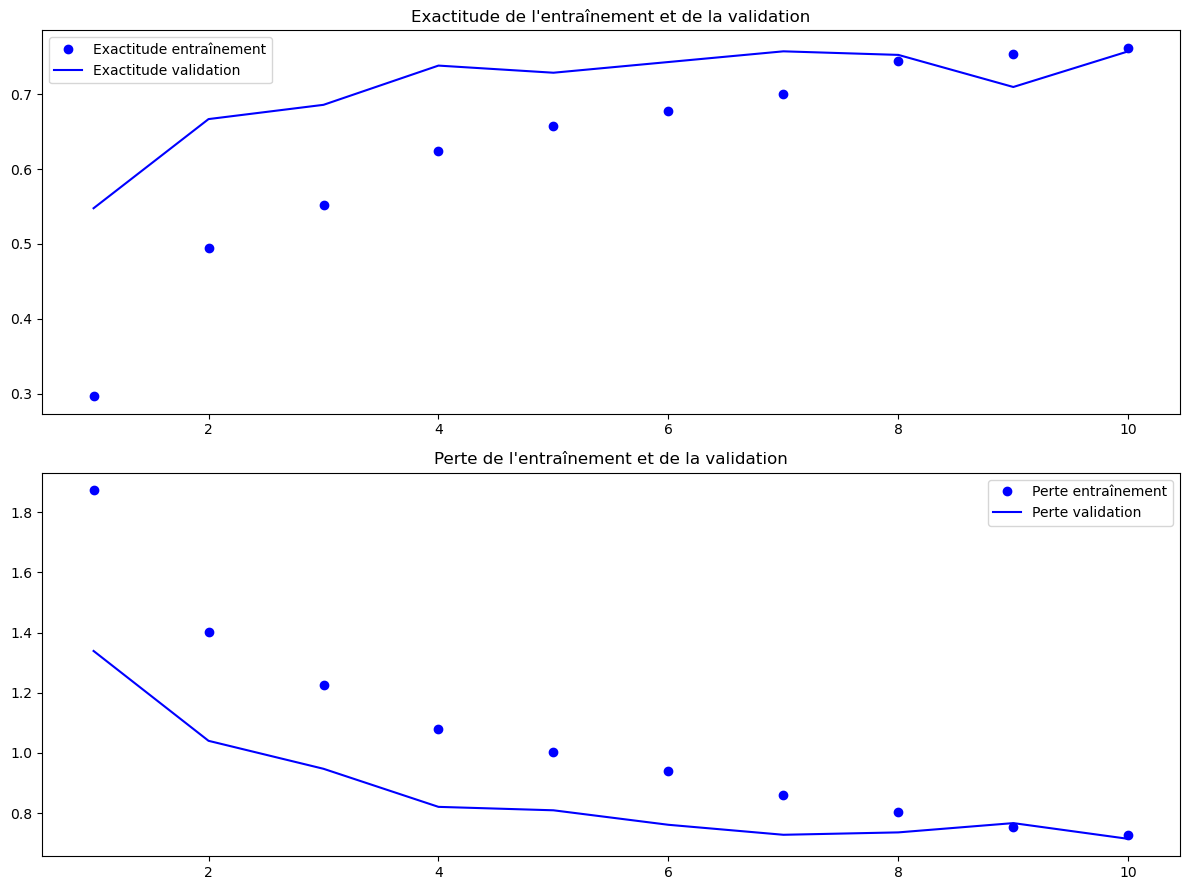

In [22]:
# Courbes de validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 9))

# Courbe de l'exactitude
plt.subplot(2, 1, 1)
plt.plot(epochs, acc, 'bo', label='Exactitude entraînement')
plt.plot(epochs, val_acc, 'b', label='Exactitude validation')
plt.title("Exactitude de l'entraînement et de la validation")
plt.legend()

# Courbe de la perte
plt.subplot(2, 1, 2)
plt.plot(epochs, loss, 'bo', label='Perte entraînement')
plt.plot(epochs, val_loss, 'b', label='Perte validation')
plt.title("Perte de l'entraînement et de la validation")
plt.legend()

plt.tight_layout()
plt.show()

In [23]:
# Évaluer le modèle sur l'ensemble de validation

loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {accuracy*100:.2f}%")      # Afficher l'exactitude de validation en pourcentage

7/7 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - accuracy: 0.7635 - loss: 0.7250
Validation Accuracy: 75.71%


C:\Users\tykap\anaconda3\envs\myenv\Lib\site-packages\PIL\Image.py:3157: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 46s 6s/step
                            precision    recall  f1-score   support

                 Baby Care       0.53      0.78      0.63        27
  Beauty and Personal Care       0.62      0.76      0.68        21
                 Computers       0.86      0.84      0.85        38
Home Decor & Festive Needs       0.90      0.60      0.72        30
           Home Furnishing       0.86      0.51      0.64        35
          Kitchen & Dining       0.75      0.92      0.83        26
                   Watches       0.88      0.91      0.90        33

                  accuracy                           0.76       210
                 macro avg       0.77      0.76      0.75       210
              weighted avg       0.79      0.76      0.76       210



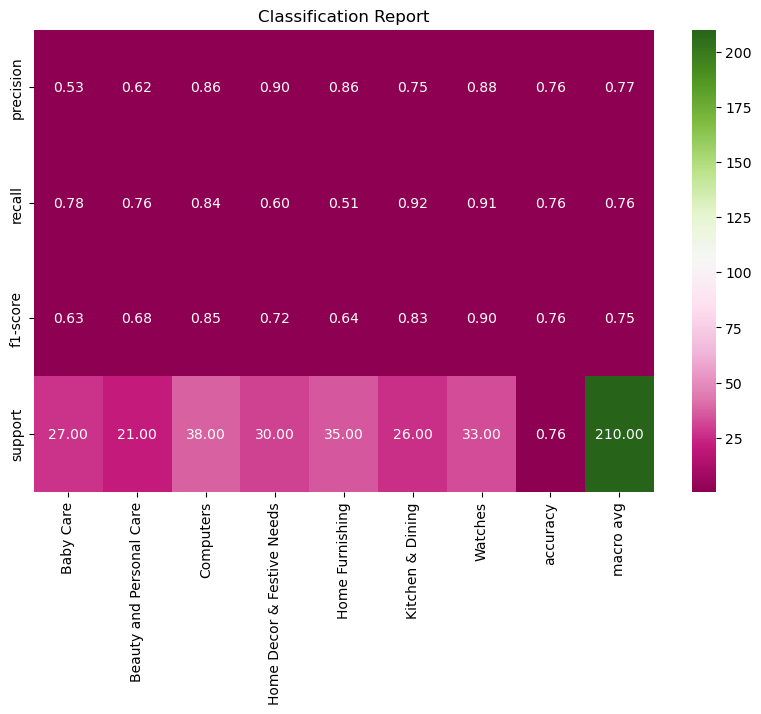

In [24]:
from sklearn.metrics import classification_report
import seaborn as sns

# Générer les prédictions pour l'ensemble de validation
validation_generator.reset()
Y_pred = model.predict(validation_generator, validation_generator.samples // validation_generator.batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)

# Obtenir les vraies étiquettes
y_true = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

# Générer le rapport de classification
report = classification_report(y_true, y_pred, target_names=class_labels)
print(report)

# Convertir le rapport de classification en format de dictionnaire
report_data = classification_report(y_true, y_pred, target_names=class_labels, output_dict=True)

# Créer un DataFrame à partir des données du rapport
df_report = pd.DataFrame(report_data).transpose()

# Visualiser le rapport de classification avec une heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_report.iloc[:-1, :].T, annot=True, cmap='PiYG', fmt='.2f')
plt.title('Classification Report')
plt.show()

# Construction d'un 2ième modèle en fine tuning

In [25]:
conv_base1 = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

In [26]:
# Geler toutes les couches 
for layer in conv_base1.layers:
    layer.trainable = False

In [27]:
conv_base1.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [28]:
# Ajout des couches de classification au-dessus du modèle pré-entraîné
model1 = models.Sequential()                       # Initialisation d'un modèle séquentiel
model1.add(conv_base)                              # Ajout de la base convolutive de VGG16
model1.add(layers.Flatten())                       # Aplatissage des sorties des convolutions
model1.add(layers.Dense(256, activation='relu'))   # Ajout d'une couche dense avec 256 unités et activation ReLU
model1.add(layers.Dropout(0.5))                    # Ajout d'une couche de dropout pour réduire le surapprentissage
model1.add(layers.Dense(64, activation='relu'))    # Ajout d'une couche dense avec 64 unités et activation ReLU
model1.add(layers.Dense(64, activation='relu'))    # Ajout d'une couche dense avec 64 unités et activation ReLU
model1.add(layers.Dense(7, activation='softmax'))  # Ajout d'une couche dense avec une unité de sortie et activation softmax

In [29]:
# Construction du modèle en passant un batch d'entrée
model1.build((None, 224, 224, 3))

In [30]:
# Compiler le modèle avec une perte categorical_crossentropy et un optimiseur RMSprop

model1.compile(loss='categorical_crossentropy',                       # Utiliser la perte categorical cross-entropie
              optimizer=optimizers.RMSprop(learning_rate=2e-5),       # Utiliser l'optimiseur RMSprop avec un taux d'apprentissage réduit
              metrics=['accuracy'])                                   # Mesurer l'exactitude du modèle

In [31]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,158,535 (80.71 MB)

 Trainable params: 13,523,271 (51.59 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [32]:
# Entraîner le modèle
history = model1.fit(
    train_generator,                        # Utiliser le générateur de données d'entraînement
    steps_per_epoch=50,                     # Nombre de pas par époque
    epochs=10,                              # Nombre d'époques d'entraînement
    validation_data=validation_generator)   # Utiliser le générateur de données de validation

Epoch 1/10
27/50 ━━━━━━━━━━━━━━━━━━━━ 2:54 8s/step - accuracy: 0.2587 - loss: 1.8802

C:\Users\tykap\anaconda3\envs\myenv\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
C:\Users\tykap\anaconda3\envs\myenv\Lib\site-packages\PIL\Image.py:3157: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


50/50 ━━━━━━━━━━━━━━━━━━━━ 277s 5s/step - accuracy: 0.2897 - loss: 1.8223 - val_accuracy: 0.5524 - val_loss: 1.3338
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 268s 5s/step - accuracy: 0.4977 - loss: 1.4123 - val_accuracy: 0.7143 - val_loss: 1.0045
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 268s 5s/step - accuracy: 0.5310 - loss: 1.2421 - val_accuracy: 0.7238 - val_loss: 0.9198
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 269s 5s/step - accuracy: 0.6133 - loss: 1.0952 - val_accuracy: 0.7238 - val_loss: 0.8247
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 273s 5s/step - accuracy: 0.6516 - loss: 1.0486 - val_accuracy: 0.7095 - val_loss: 0.8273
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 282s 5s/step - accuracy: 0.6871 - loss: 0.9449 - val_accuracy: 0.7190 - val_loss: 0.7949
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 276s 5s/step - accuracy: 0.7007 - loss: 0.8785 - val_accuracy: 0.7333 - val_loss: 0.7453
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 268s 5s/step - accuracy: 0.7115 - loss: 0.9059 - val_accuracy: 0.7476 - val_loss: 0.

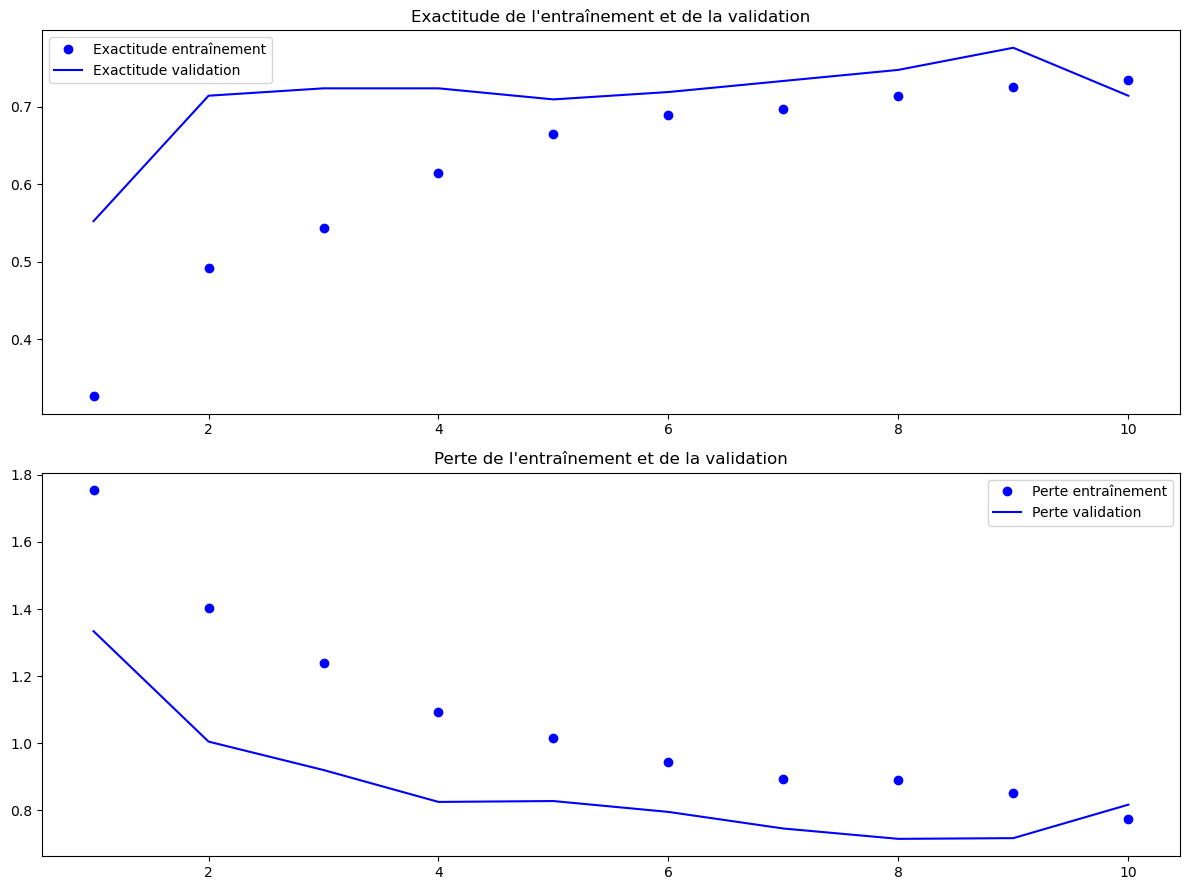

In [33]:
# Courbes de validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 9))

# Courbe de l'exactitude
plt.subplot(2, 1, 1)
plt.plot(epochs, acc, 'bo', label='Exactitude entraînement')
plt.plot(epochs, val_acc, 'b', label='Exactitude validation')
plt.title("Exactitude de l'entraînement et de la validation")
plt.legend()

# Courbe de la perte
plt.subplot(2, 1, 2)
plt.plot(epochs, loss, 'bo', label='Perte entraînement')
plt.plot(epochs, val_loss, 'b', label='Perte validation')
plt.title("Perte de l'entraînement et de la validation")
plt.legend()

plt.tight_layout()
plt.show()

In [34]:
# Évaluer le modèle sur l'ensemble de validation

loss, accuracy = model1.evaluate(validation_generator)
print(f"Validation Accuracy: {accuracy*100:.2f}%")      # Afficher l'exactitude de validation en pourcentage

7/7 ━━━━━━━━━━━━━━━━━━━━ 46s 6s/step - accuracy: 0.6944 - loss: 0.8396
Validation Accuracy: 71.43%


7/7 ━━━━━━━━━━━━━━━━━━━━ 46s 6s/step
                            precision    recall  f1-score   support

                 Baby Care       0.41      0.96      0.58        27
  Beauty and Personal Care       0.94      0.71      0.81        21
                 Computers       0.88      0.61      0.72        38
Home Decor & Festive Needs       0.80      0.53      0.64        30
           Home Furnishing       0.94      0.43      0.59        35
          Kitchen & Dining       0.71      0.92      0.80        26
                   Watches       0.89      0.94      0.91        33

                  accuracy                           0.71       210
                 macro avg       0.79      0.73      0.72       210
              weighted avg       0.80      0.71      0.72       210



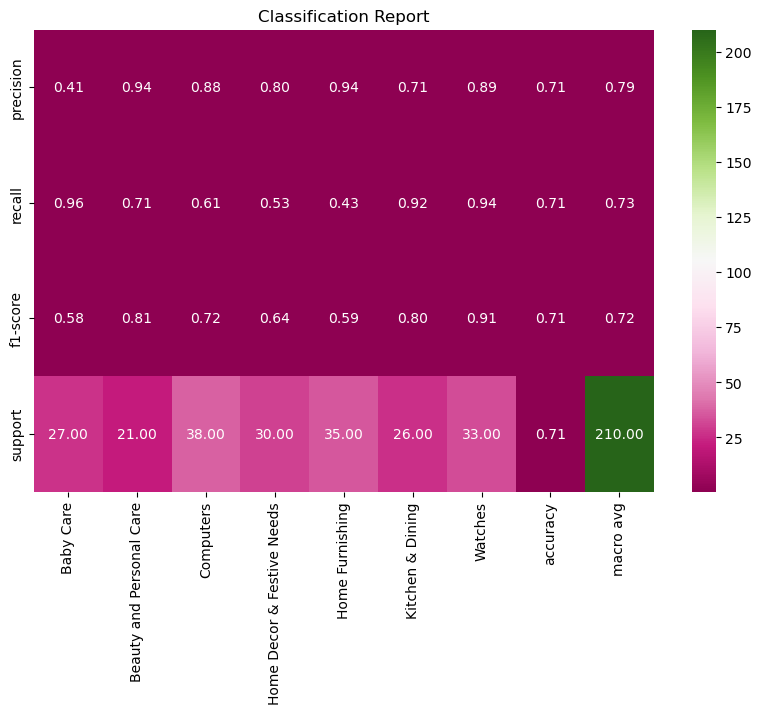

In [35]:
# Générer les prédictions pour l'ensemble de validation
validation_generator.reset()
Y_pred1 = model1.predict(validation_generator, validation_generator.samples // validation_generator.batch_size + 1)
y_pred1 = np.argmax(Y_pred1, axis=1)

# Obtenir les vraies étiquettes
y_true1 = validation_generator.classes
class_labels1 = list(validation_generator.class_indices.keys())

# Générer le rapport de classification
report1 = classification_report(y_true1, y_pred1, target_names=class_labels1)
print(report1)

# Convertir le rapport de classification en format de dictionnaire
report_data1 = classification_report(y_true1, y_pred1, target_names=class_labels1, output_dict=True)

# Créer un DataFrame à partir des données du rapport
df_report1 = pd.DataFrame(report_data1).transpose()

# Visualiser le rapport de classification avec une heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_report1.iloc[:-1, :].T, annot=True, cmap='PiYG', fmt='.2f')
plt.title('Classification Report')
plt.show()